In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("../../Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


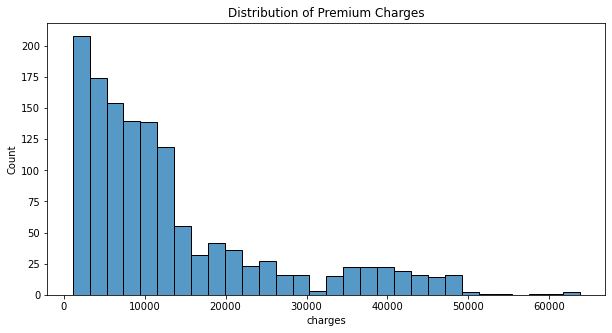

In [4]:
plt.figure(figsize = (10,5))
plt.title("Distribution of Premium Charges")
sns.histplot(df["charges"])
plt.show();

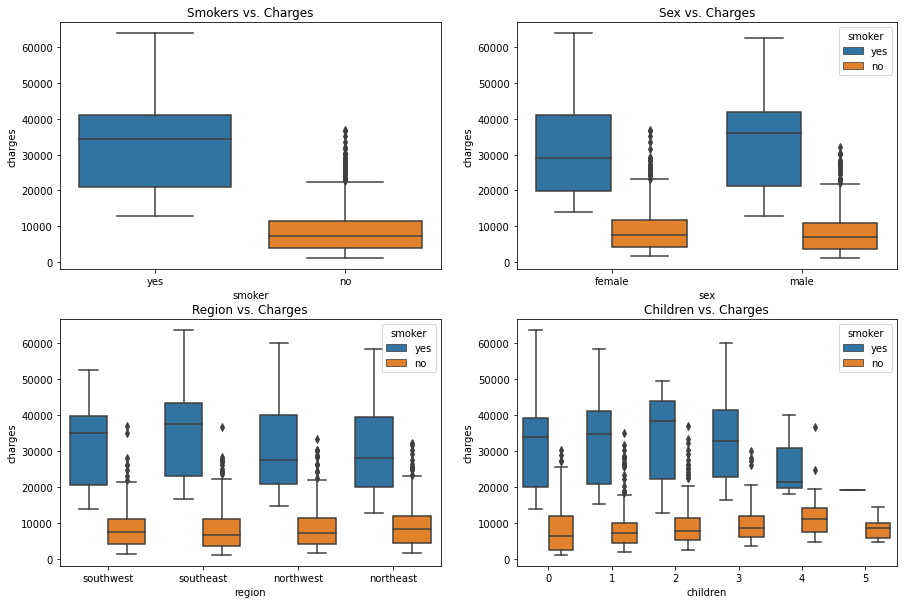

In [5]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.title("Smokers vs. Charges")
sns.boxplot(df["smoker"], df["charges"])

plt.subplot(2,2,2)
plt.title("Sex vs. Charges")
sns.boxplot(df["sex"], df["charges"], hue = df["smoker"])

plt.subplot(2,2,3)
plt.title("Region vs. Charges")
sns.boxplot(df["region"], df["charges"], hue = df["smoker"])

plt.subplot(2,2,4)
plt.title("Children vs. Charges")
sns.boxplot(df["children"], df["charges"], hue = df["smoker"])

plt.show();

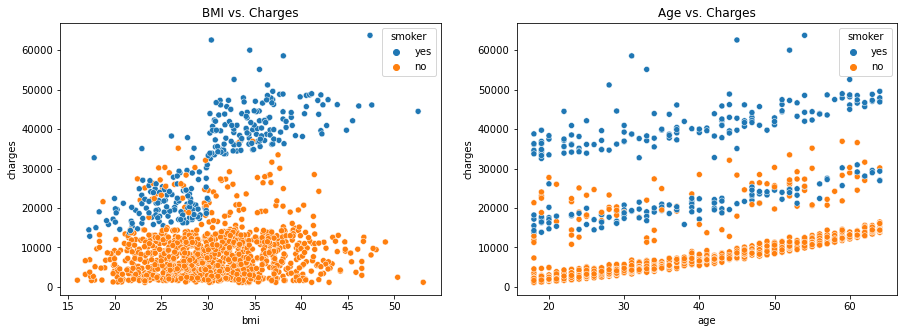

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("BMI vs. Charges")
sns.scatterplot(df["bmi"], df["charges"], hue = df["smoker"])

plt.subplot(1,2,2)
plt.title("Age vs. Charges")
sns.scatterplot(df["age"], df["charges"], hue = df["smoker"])

plt.show();

In [21]:
columns = ["sex", "smoker"]
df_encoded = pd.get_dummies(df, columns = columns, drop_first = True, prefix = "enc")
df_encoded.rename(columns = {"enc_male": "gender", "enc_yes": "smoker"}, inplace = True)
df_encoded.head()

,age,bmi,children,region,charges,gender,smoker
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [40]:
X = df_encoded.drop(["children", "region", "charges"], axis = "columns")
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
model = LinearRegression().fit(X_train, y_train)

predictions = model.predict(X_test)

y_intercept = round(model.intercept_,2)
y_intercept

-11893.86

In [39]:
df_coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
df_coefficients.columns = ["variable", "coefficient"]
df_coefficients

,variable,coefficient
0,age,236.099695
1,bmi,331.109242


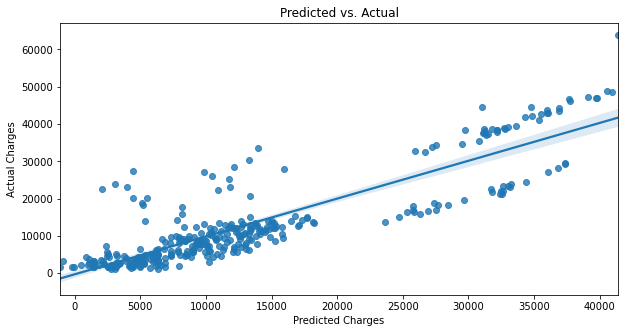

In [25]:
plt.figure(figsize = (10,5))
ax = sns.regplot(predictions, y_test)
ax.set(xlabel='Predicted Charges',
       ylabel='Actual Charges',
       title='Predicted vs. Actual')
plt.show();

In [18]:
round(mean_squared_error(predictions, y_test),2)

35898736.45

In [32]:
age_coeff, bmi_coeff, gender_coeff, smoker_coeff = df_coefficients["coefficient"]

In [28]:
list(df_coefficients["coefficient"])

[262.17643901623427, 326.70317552709173, 82.69230100156008, 23662.943224592967]

In [33]:
df_coefficients["coefficient"][0]

262.17643901623427

In [34]:
age_coeff, bmi_coeff, gender_coeff, smoker_coeff

(262.17643901623427, 326.70317552709173, 82.69230100156008, 23662.943224592967)